# Projeto Final IA

## Introdução

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

In [3]:
df = pd.read_csv('./datasets/cancer_patients.csv')
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [7]:
# print rows with nan values
print(df[df.isnull().any(axis=1)])

Empty DataFrame
Columns: [index, Patient Id, Age, Gender, Air Pollution, Alcohol use, Dust Allergy, OccuPational Hazards, Genetic Risk, chronic Lung Disease, Balanced Diet, Obesity, Smoking, Passive Smoker, Chest Pain, Coughing of Blood, Fatigue, Weight Loss, Shortness of Breath, Wheezing, Swallowing Difficulty, Clubbing of Finger Nails, Frequent Cold, Dry Cough, Snoring, Level]
Index: []

[0 rows x 26 columns]


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [8]:
df.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [9]:
df[['Passive Smoker', 'Smoking']]

,Passive Smoker,Smoking
0,2,3
1,4,2
2,3,2
3,7,7
4,7,8
...,...,...
995,8,7
996,8,7
997,3,2
998,7,8


In [10]:
features = ['Air Pollution', 'Genetic Risk', 'Alcohol use',
            'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
            'Passive Smoker', 'Fatigue'
]

In [11]:
df['Level']

0         Low
1      Medium
2        High
3        High
4        High
        ...  
995      High
996      High
997      High
998      High
999      High
Name: Level, Length: 1000, dtype: object

array([[<Axes: title={'center': 'Air Pollution'}>,
        <Axes: title={'center': 'Genetic Risk'}>,
        <Axes: title={'center': 'Alcohol use'}>],
       [<Axes: title={'center': 'chronic Lung Disease'}>,
        <Axes: title={'center': 'Balanced Diet'}>,
        <Axes: title={'center': 'Obesity'}>],
       [<Axes: title={'center': 'Smoking'}>,
        <Axes: title={'center': 'Passive Smoker'}>,
        <Axes: title={'center': 'Fatigue'}>]], dtype=object)

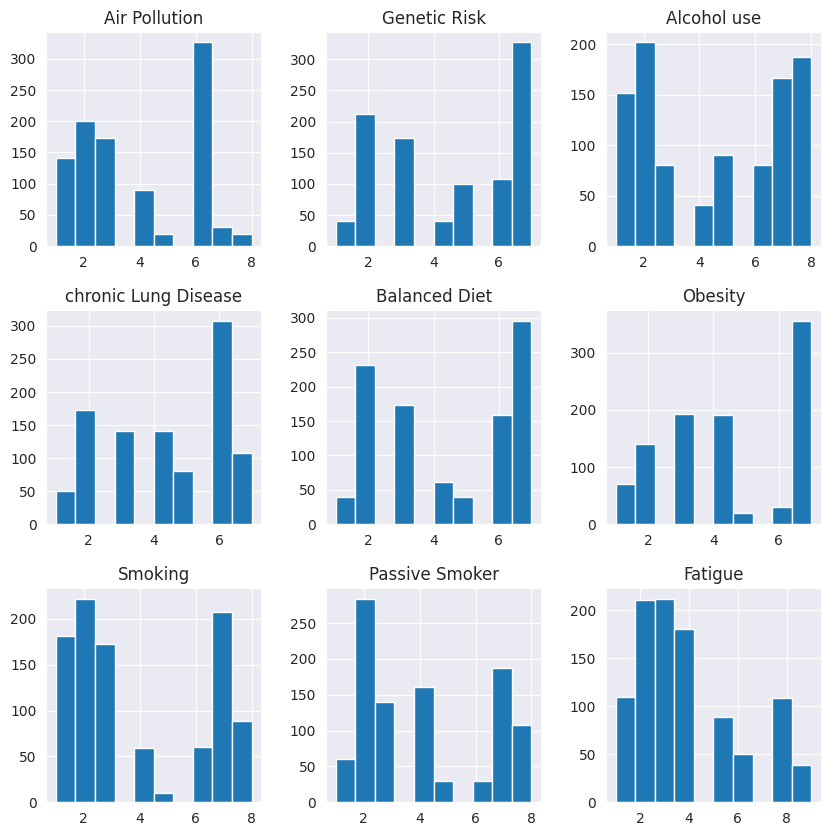

In [12]:
X = df[features]
X.hist(figsize=(10,10))

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [14]:
le = LabelEncoder()
y = le.fit_transform(df["Level"])

<Axes: >

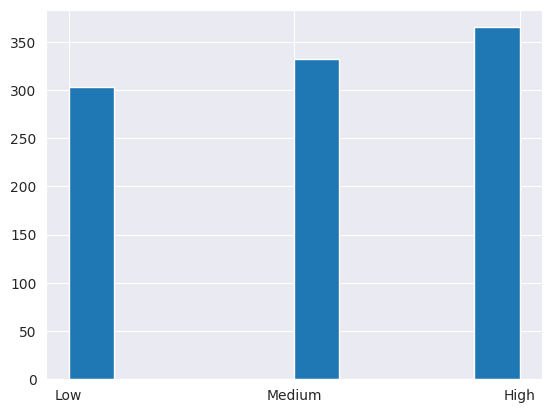

In [29]:
df["Level"].hist()

In [15]:
# árvore de decisão
from sklearn.tree import DecisionTreeClassifier
# KNN
from sklearn.neighbors import KNeighborsClassifier
# MLP
from sklearn.neural_network import MLPClassifier
# SVR
from sklearn.svm import SVC
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# XGBoosting
from sklearn.ensemble import GradientBoostingClassifier

In [16]:
# MSE
from sklearn.metrics import accuracy_score

In [24]:
total_accuracy = []
models = [
    DecisionTreeClassifier(criterion="entropy", max_depth=20), DecisionTreeClassifier(criterion="gini", max_depth=40),
    KNeighborsClassifier(n_neighbors=5, metric="infinity"), KNeighborsClassifier(n_neighbors=10, metric="euclidean"),
    MLPClassifier(learning_rate="constant", batch_size=100, activation="relu"), MLPClassifier(learning_rate="adaptive", batch_size=200, activation="logistic"),
    SVC(kernel="linear", C=1.0, gamma="auto"), SVC(kernel="rbf", C=2.0, gamma="auto"),
    RandomForestClassifier(random_state=42, max_depth=20, criterion="log_loss"), GradientBoostingClassifier(criterion="squared_error", max_depth=20)
]
for model in models:
    accuracy_temp = []
    # try:
    for _ in range(10):
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        model_ = model
        model_.fit(x_train.values, y_train)
        y_pred = model_.predict(x_test.values)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_temp.append(accuracy)
    # except:
    #     accuracy_temp.append(0)

    total_accuracy.append(np.mean(accuracy_temp))

/home/jhonatan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jhonatan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jhonatan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jhonatan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jhonatan/.local/lib/python3.10/sit

In [25]:
total_accuracy

[1.0, 1.0, 1.0, 1.0, 1.0, 0.893, 0.9099999999999999, 1.0, 1.0, 1.0]

In [27]:
result_df = pd.DataFrame({
    "Model": ["Decision Tree", "Decision Tree", "KNN", "KNN", "MLP", "MLP", "SVC", "SVC", "Random Forest", "XGBoosting"],
    "Conf": ["criterion='entropy', max_depth=20", "criterion='gini', max_depth=40", "n_neighbors=5, metric='infinity'", "n_neighbors=10, metric='euclidean'", "learning_rate='constant', batch_size=100, activation='relu'", "learning_rate='adaptive', batch_size=200, activation='logistic'", "kernel='linear', C=1.0, gamma='auto'", "kernel='rbf', C=2.0, gamma='auto'", "random_state=42, max_depth=20, criterion='log_loss'", "criterion='squared_error', max_depth=20"],
    "Accuracy": total_accuracy
})
result_df

,Model,Conf,Accuracy
0,Decision Tree,"criterion='entropy', max_depth=20",1.000
1,Decision Tree,"criterion='gini', max_depth=40",1.000
2,KNN,"n_neighbors=5, metric='infinity'",1.000
3,KNN,"n_neighbors=10, metric='euclidean'",1.000
4,MLP,"learning_rate='constant', batch_size=100, acti...",1.000
5,MLP,"learning_rate='adaptive', batch_size=200, acti...",0.893
6,SVC,"kernel='linear', C=1.0, gamma='auto'",0.910
7,SVC,"kernel='rbf', C=2.0, gamma='auto'",1.000
8,Random Forest,"random_state=42, max_depth=20, criterion='log_...",1.000
9,XGBoosting,"criterion='squared_error', max_depth=20",1.000
